In [ ]:
pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
pip install colorama

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


#IMPORTING LIBRARIES


In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

#LOAD DATASET

In [ ]:
data = pd.read_csv('malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


#Meta information of Dataframe

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514391 entries, 0 to 514390
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     514391 non-null  object
 1   type    514390 non-null  object
dtypes: object(2)
memory usage: 7.8+ MB


#Checking for NaN values

In [ ]:
data.isnull().sum()


url     0
type    1
dtype: int64

In [ ]:
count = data.type.value_counts()
count

benign        375847
defacement     95331
phishing       30791
malware        12421
Name: type, dtype: int64

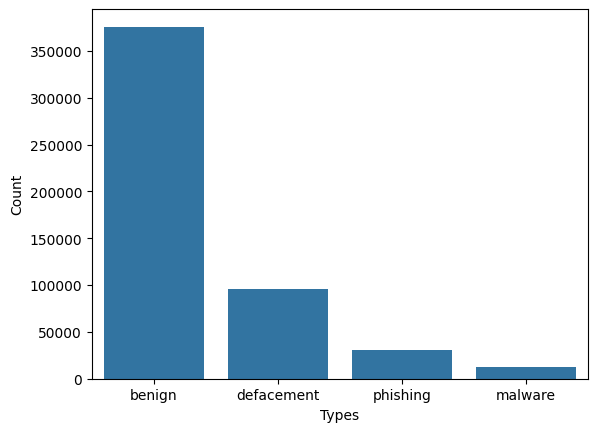

In [ ]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [ ]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
514386,http://barric.co.uk/quality-assured.htm,defacement
514387,facebook.com/pages/Mad-Science/112685432079472,benign
514388,general-search.net/download/trigal-sandro,benign
514389,nationmaster.com/country/ec-ecuador/spo-sports,benign


In [ ]:
data.head()


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

#Feature Extraction

In [ ]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))


In [ ]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))


In [ ]:
data.head()


,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2.0,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0.0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0.0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1.0,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1.0,235,adventure-nicaragua.net


In [ ]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [ ]:
data.head()


,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2.0,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0.0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0.0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1.0,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1.0,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))


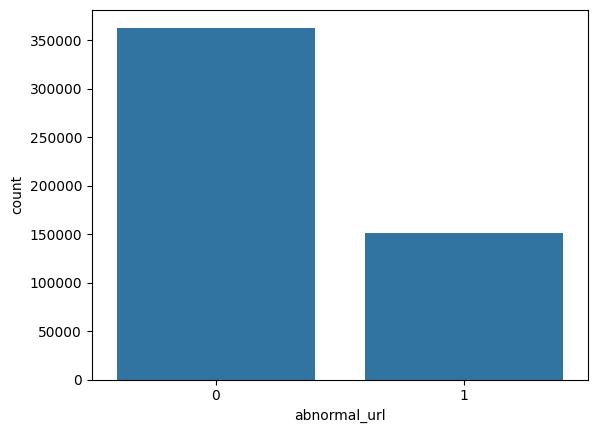

In [ ]:
sns.countplot(x='abnormal_url', data=data);


In [ ]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))


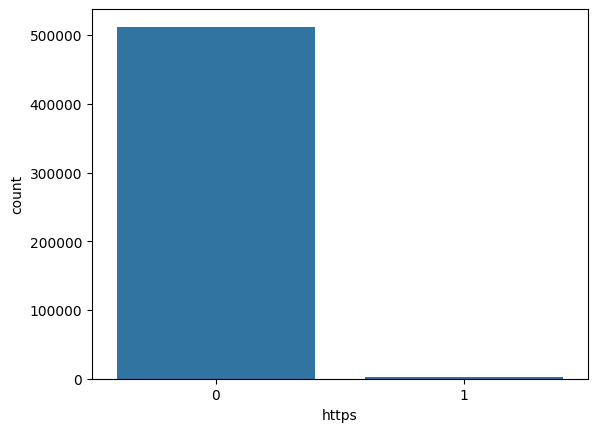

In [ ]:
sns.countplot(x='https', data=data);


In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
data['digits']= data['url'].apply(lambda i: digit_count(i))


In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [ ]:
data['letters']= data['url'].apply(lambda i: letter_count(i))


In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


In [ ]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))


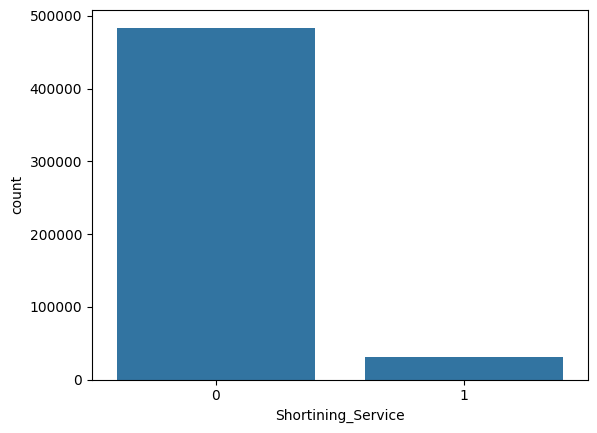

In [ ]:
sns.countplot(x='Shortining_Service', data=data);


In [ ]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [ ]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))


In [ ]:
data['having_ip_address'].value_counts()


0    514061
1       330
Name: having_ip_address, dtype: int64

<ipython-input-32-d14f9601ff3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5)


<Axes: >

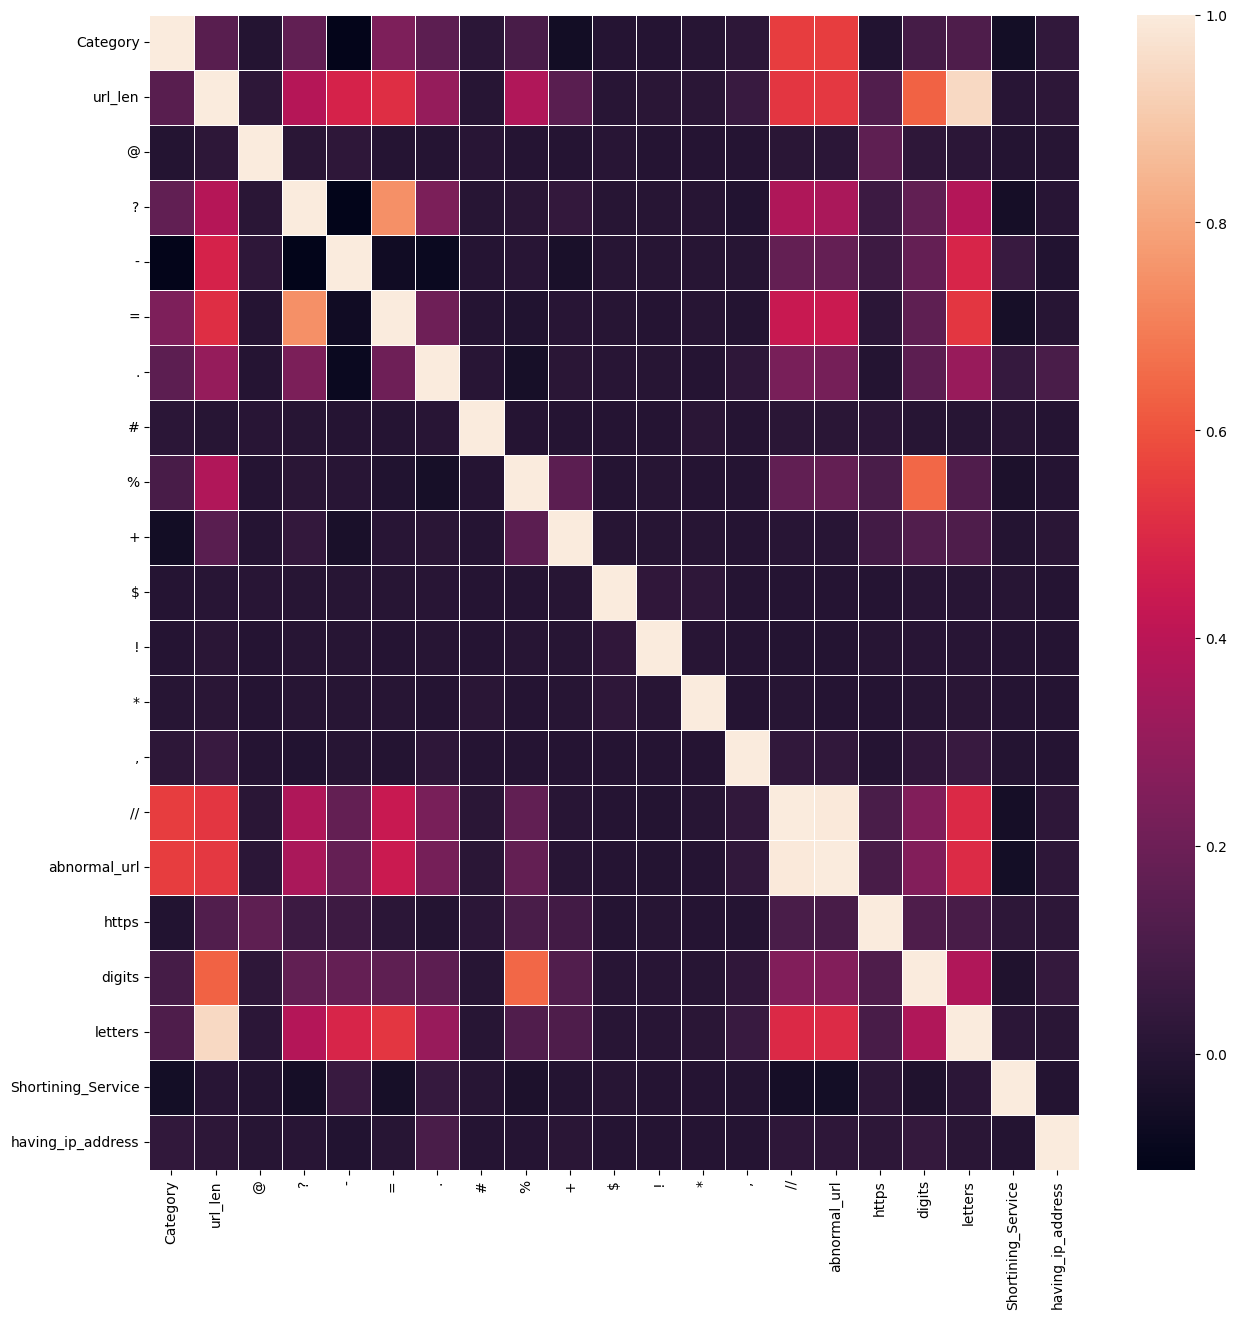

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [ ]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

#SMOTE

In [ ]:
!pip install imbalanced-learn


In [ ]:
!pip install --upgrade imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y = np.nan_to_num(y, nan=0)

In [ ]:
smote = SMOTE(random_state=2)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

<ipython-input-46-104d471174e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set1')
<ipython-input-46-104d471174e4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


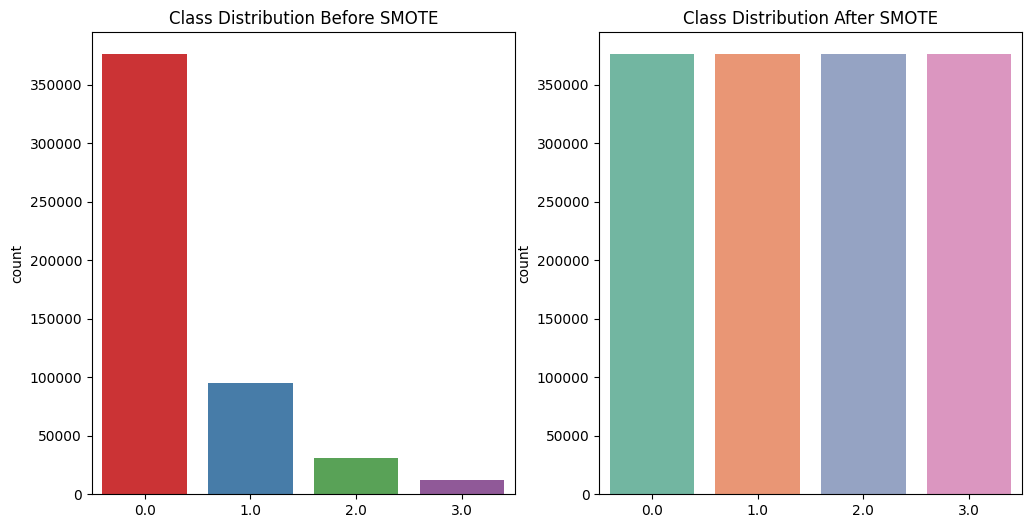

In [ ]:
# Visualize class distribution before and after SMOTE
plt.figure(figsize=(12, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='Set1')
plt.title('Class Distribution Before SMOTE')

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Class Distribution After SMOTE')

plt.show()

#Train & Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)


#Training models

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  96.86%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     75044
         1.0       0.97      0.98      0.97     75319
         2.0       0.93      0.97      0.95     75184
         3.0       0.99      0.94      0.96     75132

    accuracy                           0.97    300679
   macro avg       0.97      0.97      0.97    300679
weighted avg       0.97      0.97      0.97    300679

             Confusion_matrix 


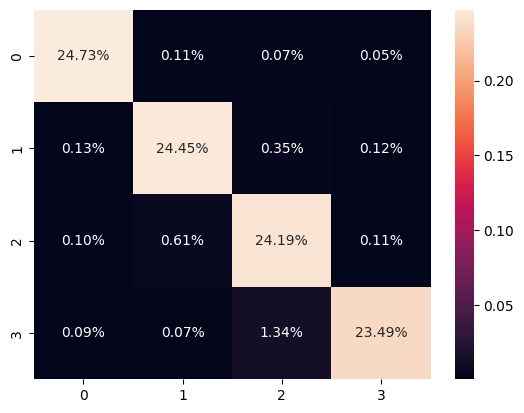

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  97.18%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     75044
         1.0       0.97      0.98      0.98     75319
         2.0       0.94      0.97      0.95     75184
         3.0       0.99      0.94      0.97     75132

    accuracy                           0.97    300679
   macro avg       0.97      0.97      0.97    300679
weighted avg       0.97      0.97      0.97    300679

             Confusion_matrix 


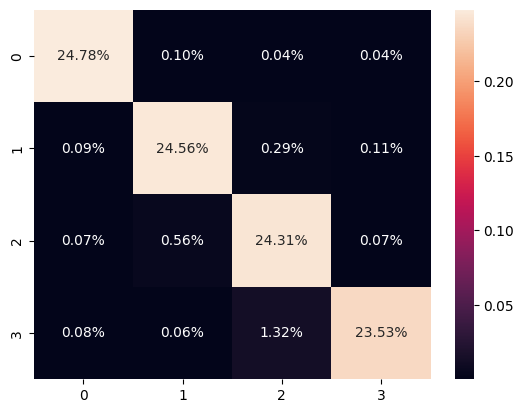

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy :  61.22%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.74      0.13      0.22     75044
         1.0       0.74      0.83      0.78     75319
         2.0       0.49      0.82      0.61     75184
         3.0       0.65      0.67      0.66     75132

    accuracy                           0.61    300679
   macro avg       0.65      0.61      0.57    300679
weighted avg       0.65      0.61      0.57    300679

             Confusion_matrix 


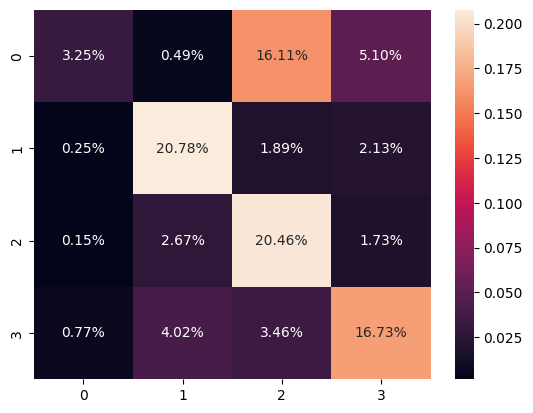

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  96.41%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     75044
         1.0       0.97      0.98      0.97     75319
         2.0       0.93      0.96      0.94     75184
         3.0       0.97      0.94      0.96     75132

    accuracy                           0.96    300679
   macro avg       0.96      0.96      0.96    300679
weighted avg       0.96      0.96      0.96    300679

             Confusion_matrix 


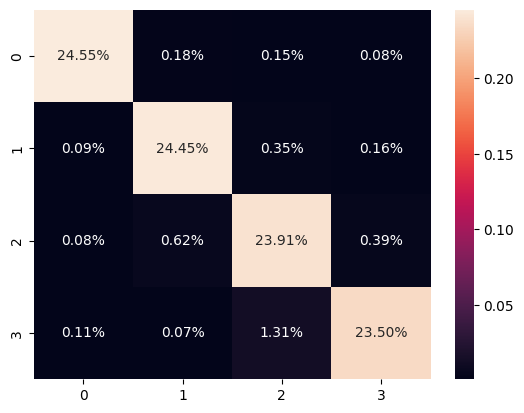

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  73.85%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82     75044
         1.0       0.63      0.96      0.76     75319
         2.0       0.70      0.75      0.72     75184
         3.0       0.85      0.50      0.63     75132

    accuracy                           0.74    300679
   macro avg       0.77      0.74      0.73    300679
weighted avg       0.77      0.74      0.73    300679

             Confusion_matrix 


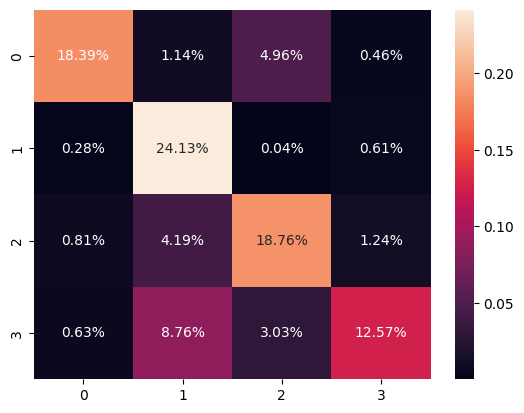

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  97.28%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     75044
         1.0       0.97      0.98      0.98     75319
         2.0       0.94      0.97      0.96     75184
         3.0       0.99      0.94      0.97     75132

    accuracy                           0.97    300679
   macro avg       0.97      0.97      0.97    300679
weighted avg       0.97      0.97      0.97    300679

             Confusion_matrix 


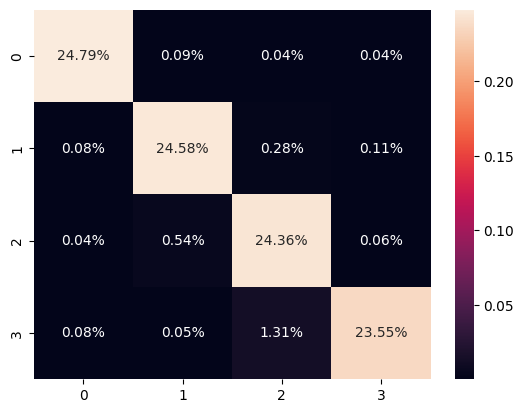

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  38.16%  
              Classification_report 
              precision    recall  f1-score   support

         0.0       0.81      0.05      0.09     75044
         1.0       0.55      1.00      0.71     75319
         2.0       0.64      0.01      0.01     75184
         3.0       0.23      0.48      0.31     75132

    accuracy                           0.38    300679
   macro avg       0.56      0.38      0.28    300679
weighted avg       0.56      0.38      0.28    300679

             Confusion_matrix 


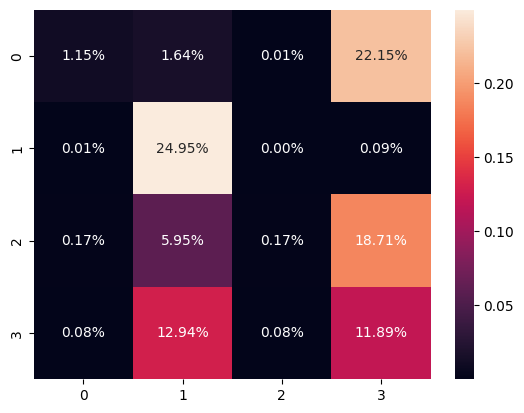

###################- End -###################


In [ ]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

#Final Report

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'AdaBoost Classifier','KNeighbors Classifier','SGD Classifier',
                                'Extra Trees Classifier','Gaussian NB'],
                      "Accuracy":accuracy_test})

In [ ]:
output

,Model,Accuracy
0,Decision Tree Classifier,0.968588
1,Random Forest Classifier,0.971791
2,AdaBoost Classifier,0.612178
3,KNeighbors Classifier,0.964071
4,SGD Classifier,0.738502
5,Extra Trees Classifier,0.972775
6,Gaussian NB,0.381583


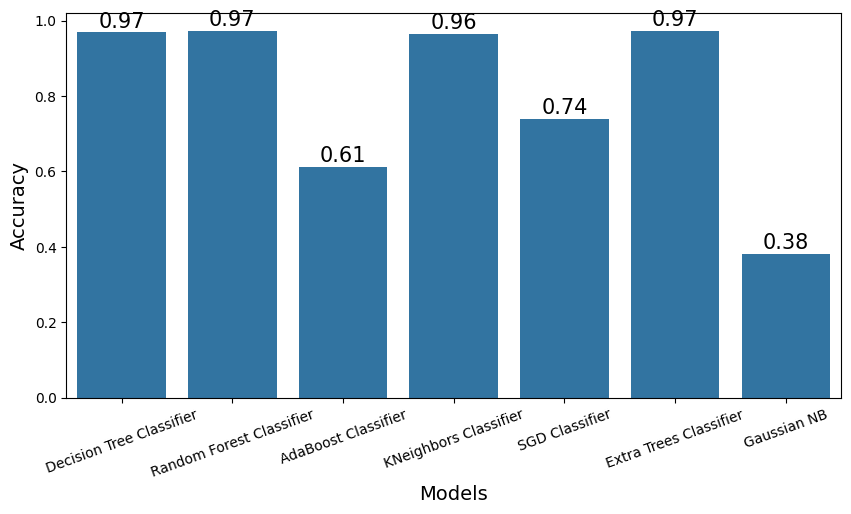

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()
